In [78]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
import matplotlib.patches as patches

def plot_comparison(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title("original")
    ax1.axis("off")
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis("off")
    
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()
    
def show_image_with_corners(image, coords, title="Corners detected"):
    plt.imshow(image, interpolation='nearest', cmap='gray')
    plt.title(title)
    plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=15)
    plt.axis('off')
    plt.show()

def show_detected_face(result, detected, title="Face image"):
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')
    for patch in detected:
        img_desc.add_patch(
             patches.Rectangle(

(patch['c'],patch['r']),patch['width'],patch['height'],color='r',
linewidth=2))
    plt.show()
image = plt.imread(r"D:\new_phone.jpg")

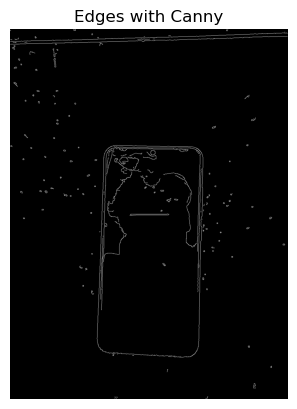

In [63]:
#Bài tập 4.1: Tìm cạnh với thuật toán Canny

# Tải các thư viện cần thiết
from skimage.feature import canny
# chuyển đổi ảnh thành ảnh xám
gray_image = color.rgb2gray(image)
# Áp dụng bộ lọc cạnh
canny_edges = canny(gray_image)
# Hiển thị kết quả
show_image(canny_edges, "Edges with Canny")


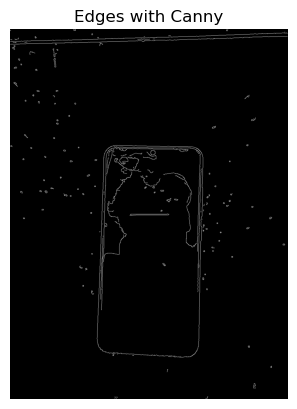

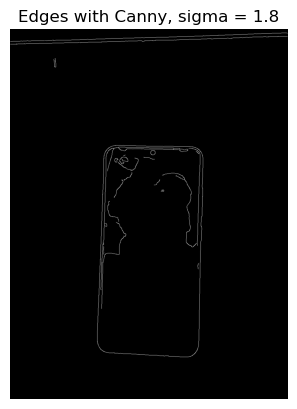

In [12]:
#Bài tập 4.2: Khảo sát ảnh hưởng của việc lọc nhiễu lên bộ lọc phát hiện cạnh

# Ứng dụng phát hiện cạnh với sigma =1.8

canny_edges_1 = canny(gray_image, sigma=1.8)

show_image(canny_edges, "Edges with Canny")
show_image(canny_edges_1, "Edges with Canny, sigma = 1.8")

# Bài tập 4.3: Phát hiện góc bằng bộ lọc Harris

# Khai báo các thư viện cần thiết
from skimage.feature import corner_harris, corner_peaks

image_n = plt.imread(r"D:\n_phone.jpg")
gray_image_n = color.rgb2gray(image_n)
# Ứng dụng bộ lọc Harris để xác định các góc có khả năng:
measure_image = corner_harris(gray_image_n)
# Tìm đỉnh của các góc dựa trên đáp ứng của bộ lọc Harris
coords = corner_peaks(measure_image,threshold_abs = 1.8,  min_distance=5)
# Hiển thị kết quả và so sánh 
show_image(image_n, "Original")
show_image_with_corners(image_n, coords)


#Bài tập 4.4: Khảo sát ảnh hưởng của tham số min_distance trong việc phát hiện góc

# Thay đổi tham số điều khiển min_distance và quan sát số lượng các góc có thể tìm được
min_distance = 150

coords_w_min_2 = corner_peaks(measure_image, min_distance=min_distance)
print("With a min_distance set to " + str(min_distance) + " we detect a total " + str(len(coords_w_min_2)) + " corners in the image.")

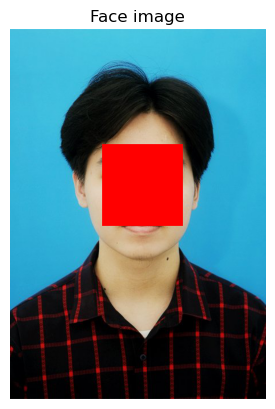

Detected face: [{'r': 203, 'c': 163, 'width': 138, 'height': 138}]


In [79]:
#Bài tập 4.5: Nhận diện khuôn mặt

from skimage.feature import Cascade
from skimage import data

image = plt.imread(r'D:\New Volume\Profile\anh the.jpg')
# Tải mô hình đã được huấn luyện sẵn
trained_file = data.lbp_frontal_face_cascade_filename()
# khởi tạo đối tượng phát hiện khuôn mặt
detector = Cascade(trained_file)
# Thay đổi các tham số điều khiển giá trị lớn nhất và giá trị nhỏ nhất của khuôn mặt và đánh giá sự thay đổi
detected = detector.detect_multi_scale(img = image, scale_factor=1.2, step_ratio=1,min_size=(10,10), max_size=(200,200))
# Hiển thị kết quả.
show_detected_face(image, detected)
print("Detected face:", detected)


#Bài tập 4.6: Nhận dạng nhiều khuôn mặt

image1 = plt.imread(r"D:\student.jpg")
# Tải mô hình đã được huấn luyện sẵn
trained_file = data.lbp_frontal_face_cascade_filename()
# khởi tạo đối tượng phát hiện khuôn mặt
detector = Cascade(trained_file)
# Thay đổi các tham số điều khiển giá trị lớn nhất và giá trị nhỏ nhất của khuôn mặt và đánh giá sự thay đổi
detected = detector.detect_multi_scale(img = image1, scale_factor=1.2,step_ratio=1, min_size=(10, 10), max_size=(200, 200))
# Hiển thị kết quả.
show_detected_face(image1, detected)
print("Detected face:", detected)


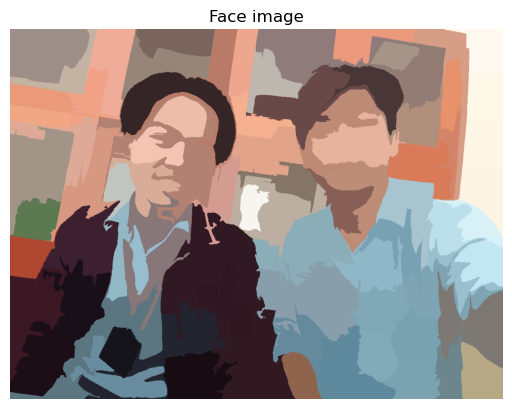

In [69]:
#Bài tập 4.7: Phân đoạn và phát hiện khuôn mặt

from skimage.segmentation import slic
from skimage.color import label2rgb
# Tách ảnh gốc thành 100 vùng
segments = slic(image1, n_segments=100, compactness=10, sigma=1)
# Tạo ra ảnh phân đoạn bằng hàm label2rgb
segmented_image = label2rgb(segments, image1, kind='avg')
# Phát hiện khuôn mặt dựa vào ảnh phân đoạn
detected = detector.detect_multi_scale(img=image1, scale_factor=1.2, step_ratio=1, min_size=(10, 10), max_size=(1000, 1000))
# Hiển thị kết quả và so sánh
show_detected_face(segmented_image, detected)

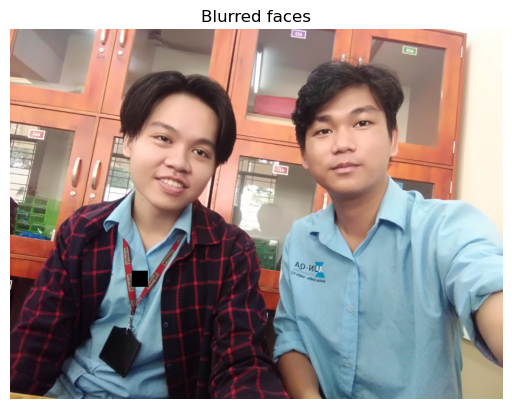

In [77]:
#Bài tập 4.8: Bảo vệ quyền riêng tư

import skimage

def getFace(d):
    ''' Extracts the face rectangle from the image using the
    coordinates of the detected.'''
    # X and Y starting points of the face rectangle
    x, y = d['r'], d['c']
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'], d['c'] + d['height']
    # Extract the detected face
    face= image[x:width, y:height]
    return face

def mergeBlurryFace(original, gaussian_image):
     # truy vấn vào toạ độ góc trên cùng bên trái của khuôn mặt
     x, y = d['r'], d['c']
     # Truy vấn và toạ độ góc dưới cùng bên phải của khuôn mặt
     width, height = d['r'] + d['width'], d['c'] + d['height']
     original[ x:width, y:height] = gaussian_image
     # trả về ảnh đã được làm mờ
     return original

detected = detector.detect_multi_scale(img=image, scale_factor=1.2, step_ratio=1, min_size=(30, 30), max_size=(100, 100))

for d in detected:
    # Tác khuôn mặt ra khỏi ảnh gốc
    face = getFace(d)
    # làm mờ khuôn mặt
    blurred_face = skimage.filters.gaussian(face, multichannel=True, sigma=10)
# kết hợp ảnh đã được làm mờ với ảnh gốc

resulting_image = mergeBlurryFace(image1.copy(), blurred_face)

show_image(resulting_image, "Blurred faces")




